# Logic gates using RNA editing

This notebook uses [Julia](https://julialang.org)

In [1]:
using Catalyst #https://github.com/SciML/Catalyst.jl
using DifferentialEquations #https://github.com/SciML/DifferentialEquations.jl
using Plots #https://github.com/JuliaPlots/Plots.jl

## A buffer gate using a single PPR editing factor to create a start codon

<img src="img/buffer_gate.png">

In [3]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + ACG
    PPRonrate, ACG + PPR --> ACG_PPR
    PPRoffrate, ACG_PPR --> ACG + PPR
    PPRonrate, AUG + PPR --> AUG_PPR
    PPRoffrate, AUG_PPR --> AUG + PPR
    editingrate, ACG_PPR --> AUG_PPR
    ribosomeonrate, AUG + R --> AUG_R
    ribosomeAUGoffrate, AUG_R --> AUG + R
    AUGtranslationrate, AUG_R --> GFP + AUG + R
    ribosomeonrate, ACG + R --> ACG_R
    ribosomeACGoffrate, ACG_R --> ACG + R
    ACGtranslationrate, ACG_R --> GFP + ACG + R
    RNAdegradationrate, ACG --> ∅
    RNAdegradationrate, AUG --> ∅
    RNAdegradationrate, ACG_R --> R
    RNAdegradationrate, AUG_R --> R
    RNAdegradationrate, ACG_PPR --> PPR
    RNAdegradationrate, AUG_PPR --> PPR
    GFPdegradationrate, GFP --> ∅
end

Model ##ReactionSystem#297
States (10):
  DNA(t)
  ACG(t)
  PPR(t)
  ACG_PPR(t)
⋮
Parameters (11):
  transcriptionrate
  PPRonrate
  PPRoffrate
  editingrate
⋮

In [4]:
osys = convert(ODESystem, rn)

Model ##ReactionSystem#297 with 10 equations
States (10):
  DNA(t)
  ACG(t)
  PPR(t)
  ACG_PPR(t)
⋮
Parameters (11):
  transcriptionrate
  PPRonrate
  PPRoffrate
  editingrate
⋮

In [8]:
#adjustable parameters
PPRoffrate = 1e-3
ribosomeAUGoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
editingrate = 0.1
ribosomeonrate = 1e-2
AUGtranslationrate = 0.1
ribosomeACGoffrate = 10 * ribosomeAUGoffrate
ACGtranslationrate = 1e-4
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

pmap = Pair.(parameters(rn), [transcriptionrate, PPRonrate, PPRoffrate, editingrate,
       ribosomeonrate, ribosomeAUGoffrate, AUGtranslationrate, ribosomeACGoffrate, ACGtranslationrate,
        RNAdegradationrate, GFPdegradationrate])

11-element Vector{Pair{SymbolicUtils.BasicSymbolic{Real}, Float64}}:
  transcriptionrate => 0.01
          PPRonrate => 0.01
         PPRoffrate => 0.001
        editingrate => 0.1
     ribosomeonrate => 0.01
 ribosomeAUGoffrate => 0.001
 AUGtranslationrate => 0.1
 ribosomeACGoffrate => 0.01
 ACGtranslationrate => 0.0001
 RNAdegradationrate => 0.0005
 GFPdegradationrate => 0.0005

In [9]:
species(rn)

10-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 DNA(t)
 ACG(t)
 PPR(t)
 ACG_PPR(t)
 AUG(t)
 AUG_PPR(t)
 R(t)
 AUG_R(t)
 GFP(t)
 ACG_R(t)

In [10]:
# time interval to solve on
tspan = (0.0, 10000.0)

#adjustable parameter
numPPR = 100

#initial conditions at t=0
u₀map  = Pair.(species(rn), [100,0,numPPR,0,0,0,100,0,0,0])

10-element Vector{Pair{SymbolicUtils.BasicSymbolic{Real}, Int64}}:
     DNA(t) => 100
     ACG(t) => 0
     PPR(t) => 100
 ACG_PPR(t) => 0
     AUG(t) => 0
 AUG_PPR(t) => 0
       R(t) => 100
   AUG_R(t) => 0
     GFP(t) => 0
   ACG_R(t) => 0

In [11]:
op = ODEProblem(osys, u₀map, tspan, pmap)
sol   = solve(op, AutoTsit5(Rosenbrock23()));     # Tsit5 and Rosenbrock23 are ODE solvers

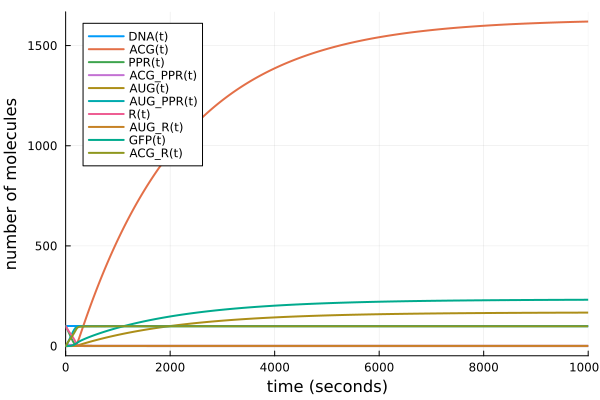

In [12]:
plot(sol, lw=2, xlabel="time (seconds)", ylabel="number of molecules")

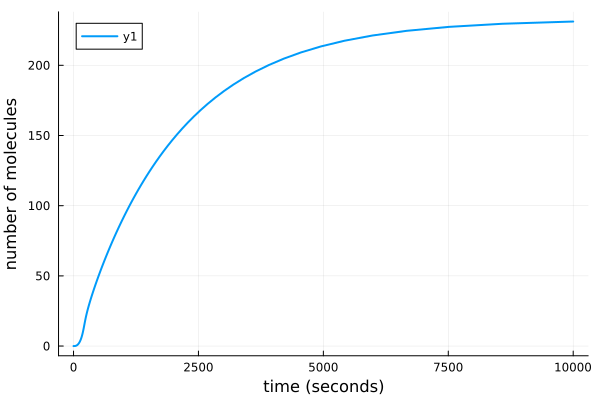

In [13]:
plot(sol.t, [x[9] for x in sol.u], lw=2, xlabel="time (seconds)", ylabel="number of molecules")

## A NOT gate using a single PPR editing factor to create a stop codon

<img src="img/NOT_gate.png">

In [14]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + CAA
    PPRonrate, CAA + PPR --> CAA_PPR
    PPRoffrate, CAA_PPR --> CAA + PPR
    PPRonrate, UAA + PPR --> UAA_PPR
    PPRoffrate, UAA_PPR --> UAA + PPR
    editingrate, CAA_PPR --> UAA_PPR
    ribosomeonrate, UAA + R --> UAA_R
    ribosomeUAAoffrate, UAA_R --> UAA + R
    ribosomeonrate, CAA + R --> CAA_R
    ribosomeCAAoffrate, CAA_R --> CAA + R
    CAAtranslationrate, CAA_R --> GFP + CAA + R
    RNAdegradationrate, CAA --> ∅
    RNAdegradationrate, UAA --> ∅
    RNAdegradationrate, CAA_R --> R
    RNAdegradationrate, UAA_R --> R
    RNAdegradationrate, CAA_PPR --> PPR
    RNAdegradationrate, UAA_PPR --> PPR
    GFPdegradationrate, GFP --> ∅
end
osys = convert(ODESystem, rn);

In [15]:
#adjustable parameters
PPRoffrate = 1e-3
ribosomeCAAoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
editingrate = 0.1
ribosomeonrate = 1e-2
CAAtranslationrate = 0.1
ribosomeUAAoffrate = 10 * ribosomeCAAoffrate
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

pmap = Pair.(parameters(rn), [transcriptionrate, PPRonrate, PPRoffrate, editingrate,
        ribosomeonrate, ribosomeCAAoffrate, CAAtranslationrate, ribosomeUAAoffrate,
        RNAdegradationrate, GFPdegradationrate])

10-element Vector{Pair{SymbolicUtils.BasicSymbolic{Real}, Float64}}:
  transcriptionrate => 0.01
          PPRonrate => 0.01
         PPRoffrate => 0.001
        editingrate => 0.1
     ribosomeonrate => 0.01
 ribosomeUAAoffrate => 0.001
 ribosomeCAAoffrate => 0.1
 CAAtranslationrate => 0.01
 RNAdegradationrate => 0.0005
 GFPdegradationrate => 0.0005

In [16]:
species(rn)

10-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 DNA(t)
 CAA(t)
 PPR(t)
 CAA_PPR(t)
 UAA(t)
 UAA_PPR(t)
 R(t)
 UAA_R(t)
 CAA_R(t)
 GFP(t)

In [17]:
# time interval to solve on
tspan = (0.0, 10000.0)

#adjustable parameter
numPPR = 100

#initial conditions at t=0
u₀map  = Pair.(species(rn), [100, 0, numPPR, 0, 0, 0, 100, 0, 0, 10000])

10-element Vector{Pair{SymbolicUtils.BasicSymbolic{Real}, Int64}}:
     DNA(t) => 100
     CAA(t) => 0
     PPR(t) => 100
 CAA_PPR(t) => 0
     UAA(t) => 0
 UAA_PPR(t) => 0
       R(t) => 100
   UAA_R(t) => 0
   CAA_R(t) => 0
     GFP(t) => 10000

In [18]:
op = ODEProblem(osys, u₀map, tspan, pmap)
sol   = solve(op, AutoTsit5(Rosenbrock23()));     # use Tsit5 or Rosenbrock23 ODE solver

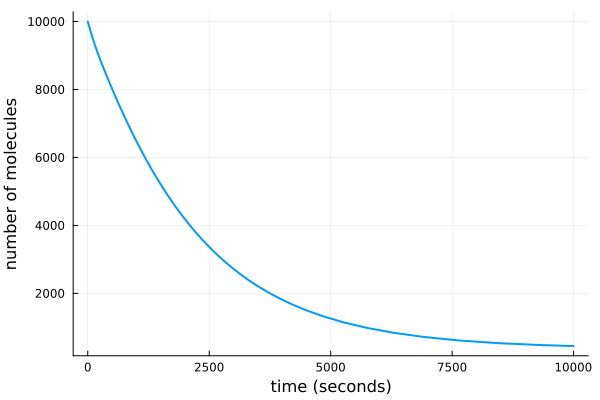

In [19]:
plot(sol.t, [x[10] for x in sol.u], lw=2, legend = false, xlabel="time (seconds)", ylabel="number of molecules")

## An OR gate using two PPR editing factors to edit alternative start codons

<img src="img/OR_gate.png">

In [20]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + ACGACG
    PPRonrate, ACGACG + PPR1 --> ACGACG_PPR1
    PPR1offrate, ACGACG_PPR1 --> ACGACG + PPR1
    PPRonrate, ACGACG + PPR2 --> ACGACG_PPR2
    PPR2offrate, ACGACG_PPR2 --> ACGACG + PPR2
    PPRonrate, AUGACG + PPR1 --> AUGACG_PPR1
    PPR1offrate, AUGACG_PPR1 --> AUGACG + PPR1
    PPRonrate, AUGACG + PPR2 --> AUGACG_PPR2
    PPR2offrate, AUGACG_PPR2 --> AUGACG + PPR2
    PPRonrate, ACGAUG + PPR1 --> ACGAUG_PPR1
    PPR1offrate, ACGAUG_PPR1 --> ACGAUG + PPR1
    PPRonrate, ACGAUG + PPR2 --> ACGAUG_PPR2
    PPR2offrate, ACGAUG_PPR2 --> ACGAUG + PPR2
    PPRonrate, AUGAUG + PPR1 --> AUGAUG_PPR1
    PPR1offrate, AUGAUG_PPR1 --> AUGAUG + PPR1
    PPRonrate, AUGAUG + PPR2 --> AUGAUG_PPR2
    PPR2offrate, AUGAUG_PPR2 --> AUGAUG + PPR2
    editingrate, ACGACG_PPR1 --> AUGACG_PPR1
    editingrate, ACGACG_PPR2 --> ACGAUG_PPR2
    ribosomeonrate, ACGACG + R --> ACGACG_R
    ribosomeACGoffrate, ACGACG_R --> ACGACG + R
    ACGtranslationrate, ACGACG_R --> GFP + ACGACG + R
    ribosomeonrate, AUGACG + R --> AUGACG_R
    ribosomeAUGoffrate, AUGACG_R --> AUGACG + R
    AUGtranslationrate, AUGACG_R --> GFP + AUGACG + R
    ribosomeonrate, ACGAUG + R --> ACGAUG_R
    ribosomeAUGoffrate, ACGAUG_R --> ACGAUG + R
    AUGtranslationrate, ACGAUG_R --> GFP + ACGAUG + R
    ribosomeonrate, AUGAUG + R --> AUGAUG_R
    ribosomeAUGoffrate, AUGAUG_R --> AUGAUG + R
    AUGtranslationrate, AUGAUG_R --> GFP + AUGAUG + R
    RNAdegradationrate, ACGACG --> ∅
    RNAdegradationrate, ACGAUG --> ∅
    RNAdegradationrate, AUGACG --> ∅
    RNAdegradationrate, AUGAUG --> ∅
    RNAdegradationrate, ACGACG_R --> R
    RNAdegradationrate, ACGAUG_R --> R
    RNAdegradationrate, AUGACG_R --> R
    RNAdegradationrate, AUGAUG_R --> R
    RNAdegradationrate, ACGACG_PPR1 --> PPR1
    RNAdegradationrate, ACGAUG_PPR1 --> PPR1
    RNAdegradationrate, AUGACG_PPR1 --> PPR1
    RNAdegradationrate, AUGAUG_PPR1 --> PPR1
    RNAdegradationrate, ACGACG_PPR2 --> PPR2
    RNAdegradationrate, ACGAUG_PPR2 --> PPR2
    RNAdegradationrate, AUGACG_PPR2 --> PPR2
    RNAdegradationrate, AUGAUG_PPR2 --> PPR2
    GFPdegradationrate, GFP --> ∅
end
osys = convert(ODESystem, rn);

The ideal result should look like this:

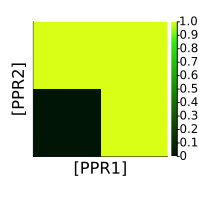

In [21]:
heatmap([[0,1] [1,1]], c = palette(:linear_green_5_95_c69_n256), ratio = :equal, xlims=(1,2), ylims=(1,2),
    size=(200,200), xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

In [22]:
#adjustable parameters
PPR1offrate = 1e-3
PPR2offrate = 1e-3
ribosomeAUGoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
editingrate = 0.1
ribosomeonrate = 1e-2
AUGtranslationrate = 0.1
ribosomeACGoffrate = 10 * ribosomeAUGoffrate
ACGtranslationrate = 1e-4
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

p = (transcriptionrate, PPRonrate, PPR1offrate, PPR2offrate, editingrate,
        ribosomeonrate, ribosomeACGoffrate, ACGtranslationrate, ribosomeAUGoffrate, AUGtranslationrate,
        RNAdegradationrate, GFPdegradationrate);

In [23]:
#initial conditions at t=0
u₀ = [100., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 100., 0., 0., 0., 0., 0.]
steps = 20
results = zeros(Float64,steps,steps)
dynamic_range = exp10.(range(0, stop=3, length=steps)) # 1 - 1000 molecules per 'cell'
#dynamic_range = range(1, stop=1000, length=steps) # 1 - 1000 molecules per 'cell'
for (i, amount1) in enumerate(dynamic_range), (j, amount2) in enumerate(dynamic_range)
    u₀[3] = amount1
    u₀[5] = amount2
    u₀map  = Pair.(species(rn), u₀)
    ssprob = SteadyStateProblem(rn, u₀, p)
    sssol  = solve(ssprob, DynamicSS(AutoTsit5(Rosenbrock23())))
    results[i,j] = sssol.u[18]
end

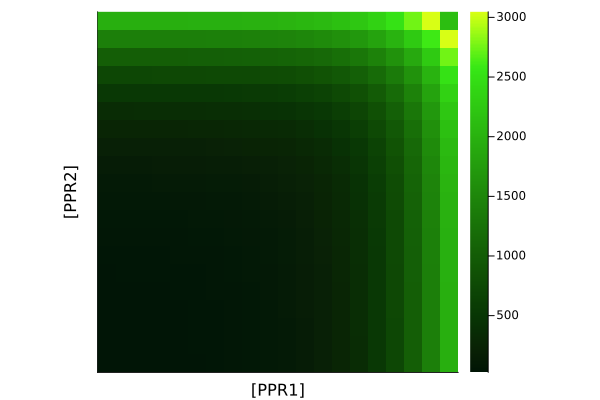

In [24]:
heatmap(results, c = palette(:linear_green_5_95_c69_n256), ratio = :equal, 
    xlims=(0.5,steps+0.5), ylims=(0.5,steps+0.5),
    xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

## A NOR gate using two PPR editing factors to edit alternative stop codons

<img src="img/NOR_gate.png">

In [25]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + CAACAA
    PPRonrate, CAACAA + PPR1 --> CAACAA_PPR1
    PPR1offrate, CAACAA_PPR1 --> CAACAA + PPR1
    PPRonrate, CAACAA + PPR2 --> CAACAA_PPR2
    PPR2offrate, CAACAA_PPR2 --> CAACAA + PPR2
    PPRonrate, UAACAA + PPR1 --> UAACAA_PPR1
    PPR1offrate, UAACAA_PPR1 --> UAACAA + PPR1
    PPRonrate, UAACAA + PPR2 --> UAACAA_PPR2
    PPR2offrate, UAACAA_PPR2 --> UAACAA + PPR2
    PPRonrate, CAAUAA + PPR1 --> CAAUAA_PPR1
    PPR1offrate, CAAUAA_PPR1 --> CAAUAA + PPR1
    PPRonrate, CAAUAA + PPR2 --> CAAUAA_PPR2
    PPR2offrate, CAAUAA_PPR2 --> CAAUAA + PPR2
    PPRonrate, UAAUAA + PPR1 --> UAAUAA_PPR1
    PPR1offrate, UAAUAA_PPR1 --> UAAUAA + PPR1
    PPRonrate, UAAUAA + PPR2 --> UAAUAA_PPR2
    PPR2offrate, UAAUAA_PPR2 --> UAAUAA + PPR2
    editingrate, CAACAA_PPR1 --> UAACAA_PPR1
    editingrate, CAACAA_PPR2 --> CAAUAA_PPR2
    ribosomeonrate, CAACAA + R --> CAACAA_R
    ribosomeCAAoffrate, CAACAA_R --> CAACAA + R
    CAAtranslationrate, CAACAA_R --> GFP + CAACAA + R
    ribosomeonrate, UAACAA + R --> UAACAA_R
    ribosomeUAAoffrate, UAACAA_R --> UAACAA + R
    ribosomeonrate, CAAUAA + R --> CAAUAA_R
    ribosomeUAAoffrate, CAAUAA_R --> CAAUAA + R
    ribosomeonrate, UAAUAA + R --> UAAUAA_R
    ribosomeUAAoffrate, UAAUAA_R --> UAAUAA + R
    RNAdegradationrate, CAACAA --> ∅
    RNAdegradationrate, CAAUAA --> ∅
    RNAdegradationrate, UAACAA --> ∅
    RNAdegradationrate, UAAUAA --> ∅
    RNAdegradationrate, CAACAA_R --> R
    RNAdegradationrate, CAAUAA_R --> R
    RNAdegradationrate, UAACAA_R --> R
    RNAdegradationrate, UAAUAA_R --> R
    RNAdegradationrate, CAACAA_PPR1 --> PPR1
    RNAdegradationrate, CAAUAA_PPR1 --> PPR1
    RNAdegradationrate, UAACAA_PPR1 --> PPR1
    RNAdegradationrate, UAAUAA_PPR1 --> PPR1
    RNAdegradationrate, CAACAA_PPR2 --> PPR2
    RNAdegradationrate, CAAUAA_PPR2 --> PPR2
    RNAdegradationrate, UAACAA_PPR2 --> PPR2
    RNAdegradationrate, UAAUAA_PPR2 --> PPR2
    GFPdegradationrate, GFP --> ∅
end
osys = convert(ODESystem, rn);

The ideal result should look like this:

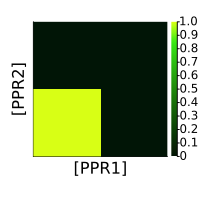

In [26]:
heatmap([[1,0] [0,0]], c = palette(:linear_green_5_95_c69_n256), ratio = :equal, xlims=(1,2), ylims=(1,2),
    size=(200,200), xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

In [27]:
#adjustable parameters
PPR1offrate = 1e-3
PPR2offrate = 1e-3
ribosomeCAAoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
editingrate = 0.1
ribosomeonrate = 1e-2
CAAtranslationrate = 0.1
ribosomeUAAoffrate = 10 * ribosomeCAAoffrate
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

p = (transcriptionrate, PPRonrate, PPR1offrate, PPR2offrate, editingrate,
        ribosomeonrate, ribosomeCAAoffrate, CAAtranslationrate, ribosomeUAAoffrate,
        RNAdegradationrate, GFPdegradationrate);

In [28]:
#initial conditions at t=0
u₀ = [100., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 100., 0., 0., 0., 0., 0.]
steps = 20
results = zeros(Float64,steps,steps)
dynamic_range = exp10.(range(0, stop=3, length=steps)) # 1 - 1000 molecules per 'cell'
#dynamic_range = range(1, stop=1000, length=steps) # 1 - 1000 molecules per 'cell'
for (i, amount1) in enumerate(dynamic_range), (j, amount2) in enumerate(dynamic_range)
    u₀[3] = amount1
    u₀[5] = amount2
    u₀map  = Pair.(species(rn), u₀)
    ssprob = SteadyStateProblem(rn, u₀, p)
    sssol  = solve(ssprob, DynamicSS(AutoTsit5(Rosenbrock23())))
    results[i,j] = sssol.u[18]
end

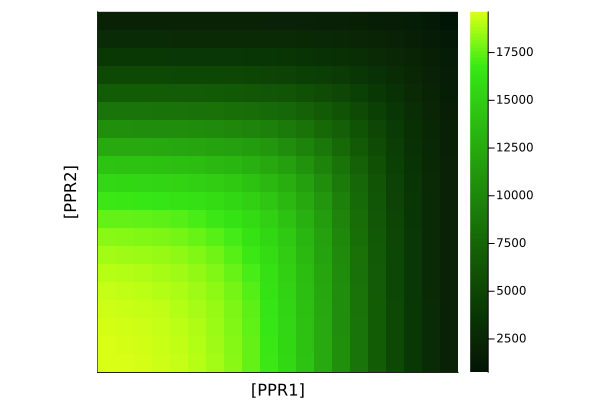

In [29]:
heatmap(results, c = palette(:linear_green_5_95_c69_n256), ratio = :equal, 
    xlims=(0.5,steps+0.5), ylims=(0.5,steps+0.5),
    xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

## An AND gate using two PPR editing factors: one to edit the start codon, the other to edit the first PPR's binding site

<img src="img/AND_gate.png">

In [30]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + CACG
    PPRonrate, CACG + PPR1 --> CACG_PPR1
    PPR1offrate, CACG_PPR1 --> CACG + PPR1
    PPRonrate, UACG + PPR1 --> UACG_PPR1
    PPR1offrate, UACG_PPR1 --> UACG + PPR1
    PPRonrate, UACG + PPR2 --> UACG_PPR2
    PPR2offrate, UACG_PPR2 --> UACG + PPR2
    PPRonrate, UAUG + PPR1 --> UAUG_PPR1
    PPR1offrate, UAUG_PPR1 --> UAUG + PPR1
    PPRonrate, UAUG + PPR2 --> UAUG_PPR2
    PPR2offrate, UAUG_PPR2 --> UAUG + PPR2
    editingrate, CACG_PPR1 --> UACG_PPR1
    editingrate, UACG_PPR2 --> UAUG_PPR2
    ribosomeonrate, CACG + R --> CACG_R
    ribosomeACGoffrate, CACG_R --> CACG + R
    ACGtranslationrate, CACG_R --> GFP + CACG + R
    ribosomeonrate, UACG + R --> UACG_R
    ribosomeACGoffrate, UACG_R --> UACG + R
    ACGtranslationrate, UACG_R --> GFP + UACG + R
    ribosomeonrate, UAUG + R --> UAUG_R
    ribosomeAUGoffrate, UAUG_R --> UAUG + R
    AUGtranslationrate, UAUG_R --> GFP + UAUG + R
    RNAdegradationrate, CACG --> ∅
    RNAdegradationrate, UACG --> ∅
    RNAdegradationrate, UAUG --> ∅
    RNAdegradationrate, CACG_R --> R
    RNAdegradationrate, UACG_R --> R
    RNAdegradationrate, UAUG_R --> R
    RNAdegradationrate, CACG_PPR1 --> PPR1
    RNAdegradationrate, UACG_PPR1 --> PPR1
    RNAdegradationrate, UAUG_PPR1 --> PPR1
    RNAdegradationrate, CACG_PPR2 --> PPR2
    RNAdegradationrate, UACG_PPR2 --> PPR2
    RNAdegradationrate, UAUG_PPR2 --> PPR2
    GFPdegradationrate, GFP --> ∅
end
osys = convert(ODESystem, rn);

The ideal result should look like this:

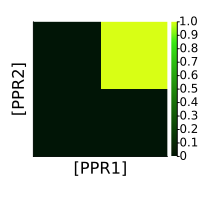

In [31]:
heatmap([[0,0] [0,1]], c = palette(:linear_green_5_95_c69_n256), ratio = :equal, xlims=(1,2), ylims=(1,2),
    size=(200,200), xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

In [32]:
#adjustable parameters
PPR1offrate = 1e-3
PPR2offrate = 1e-3
ribosomeAUGoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
#PPR2mismatchoffrate = 1000 * PPR2offrate
editingrate = 0.1
ribosomeonrate = 1e-2
AUGtranslationrate = 0.1
ribosomeACGoffrate = 10 * ribosomeAUGoffrate
ACGtranslationrate = 1e-4
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

p = (transcriptionrate, PPRonrate, PPR1offrate, PPR2offrate, editingrate,
        ribosomeonrate, ribosomeACGoffrate, ACGtranslationrate, ribosomeAUGoffrate, AUGtranslationrate,
        RNAdegradationrate, GFPdegradationrate);

In [33]:
#initial conditions at t=0
u₀ = [100., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 100., 0., 0., 0., 0., 0.]
steps = 20
results = zeros(Float64,steps,steps)
dynamic_range = exp10.(range(0, stop=3, length=steps)) # 1 - 1000 molecules per 'cell'
#dynamic_range = range(1, stop=1000, length=steps) # 1 - 1000 molecules per 'cell'
for (i, amount1) in enumerate(dynamic_range), (j, amount2) in enumerate(dynamic_range)
    u₀[3] = amount1
    u₀[7] = amount2
    u₀map  = Pair.(species(rn), u₀)
    ssprob = SteadyStateProblem(rn, u₀, p)
    sssol  = solve(ssprob, DynamicSS(AutoTsit5(Rosenbrock23())))
    results[i,j] = sssol.u[14]
end

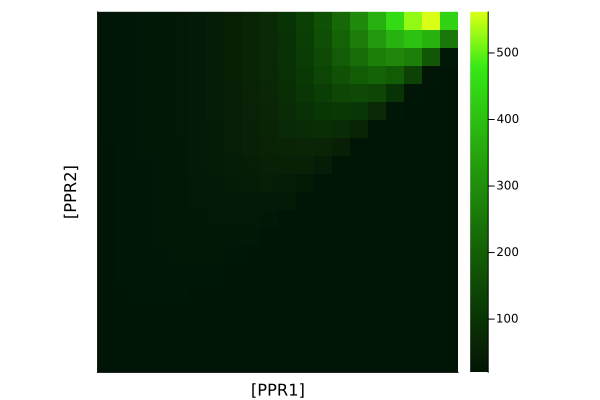

In [34]:
heatmap(results, c = palette(:linear_green_5_95_c69_n256), ratio = :equal, 
    xlims=(0.5,steps+0.5), ylims=(0.5,steps+0.5),
    xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

## A NAND gate using two PPR editing factors: one to edit a stop codon, the other to edit the first PPR's binding site

<img src="img/NAND_gate.png">

In [35]:
rn = @reaction_network begin
    transcriptionrate, DNA --> DNA + CCAA
    PPRonrate, CCAA + PPR1 --> CCAA_PPR1
    PPR1offrate, CCAA_PPR1 --> CCAA + PPR1
    PPRonrate, UCAA + PPR1 --> UCAA_PPR1
    PPR1offrate, UCAA_PPR1 --> UCAA + PPR1
    PPRonrate, UCAA + PPR2 --> UCAA_PPR2
    PPR2offrate, UCAA_PPR2 --> UCAA + PPR2
    PPRonrate, UUAA + PPR1 --> UUAA_PPR1
    PPR1offrate, UUAA_PPR1 --> UUAA + PPR1
    PPRonrate, UUAA + PPR2 --> UUAA_PPR2
    PPR2offrate, UUAA_PPR2 --> UUAA + PPR2
    editingrate, CCAA_PPR1 --> UCAA_PPR1
    editingrate, UCAA_PPR2 --> UUAA_PPR2
    ribosomeonrate, CCAA + R --> CCAA_R
    ribosomeCAAoffrate, CCAA_R --> CCAA + R
    CAAtranslationrate, CCAA_R --> GFP + CCAA + R
    ribosomeonrate, UCAA + R --> UCAA_R
    ribosomeCAAoffrate, UCAA_R --> UCAA + R
    CAAtranslationrate, UCAA_R --> GFP + UCAA + R
    ribosomeonrate, UUAA + R --> UUAA_R
    ribosomeUAAoffrate, UUAA_R --> UUAA + R
    RNAdegradationrate, CCAA --> ∅
    RNAdegradationrate, UCAA --> ∅
    RNAdegradationrate, UUAA --> ∅
    RNAdegradationrate, CCAA_R --> R
    RNAdegradationrate, UCAA_R --> R
    RNAdegradationrate, UUAA_R --> R
    RNAdegradationrate, CCAA_PPR1 --> PPR1
    RNAdegradationrate, UCAA_PPR1 --> PPR1
    RNAdegradationrate, UUAA_PPR1 --> PPR1
    RNAdegradationrate, CCAA_PPR2 --> PPR2
    RNAdegradationrate, UCAA_PPR2 --> PPR2
    RNAdegradationrate, UUAA_PPR2 --> PPR2
    GFPdegradationrate, GFP --> ∅
end
osys = convert(ODESystem, rn);

In [36]:
#adjustable parameters
PPR1offrate = 1e-3
PPR2offrate = 1e-3
ribosomeCAAoffrate = 1e-3

#fixed parameters
transcriptionrate = 1e-2
PPRonrate = 1e-2
editingrate = 0.1
ribosomeonrate = 1e-2
CAAtranslationrate = 0.1
ribosomeUAAoffrate = 10 * ribosomeCAAoffrate
RNAdegradationrate = 5e-4
GFPdegradationrate = 5e-4

p = (transcriptionrate, PPRonrate, PPR1offrate, PPR2offrate, editingrate,
        ribosomeonrate, ribosomeCAAoffrate, CAAtranslationrate, ribosomeUAAoffrate,
        RNAdegradationrate, GFPdegradationrate);

The ideal result should look like this:

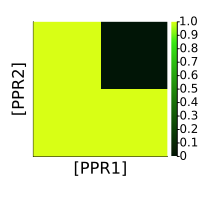

In [37]:
heatmap([[1,1] [1,0]], c = palette(:linear_green_5_95_c69_n256), ratio = :equal, xlims=(1,2), ylims=(1,2),
    size=(200,200), xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")

In [38]:
#initial conditions at t=0
u₀ = [100., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 100., 0., 0., 0., 0., 0.]
steps = 20
results = zeros(Float64,steps,steps)
dynamic_range = exp10.(range(0, stop=3, length=steps)) # 1 - 1000 molecules per 'cell'
#dynamic_range = range(1, stop=1000, length=steps) # 1 - 1000 molecules per 'cell'
for (i, amount1) in enumerate(dynamic_range), (j, amount2) in enumerate(dynamic_range)
    u₀[3] = amount1
    u₀[7] = amount2
    u₀map  = Pair.(species(rn), u₀)
    ssprob = SteadyStateProblem(rn, u₀, p)
    sssol  = solve(ssprob, DynamicSS(AutoTsit5(Rosenbrock23())))
    results[i,j] = sssol.u[14]
end

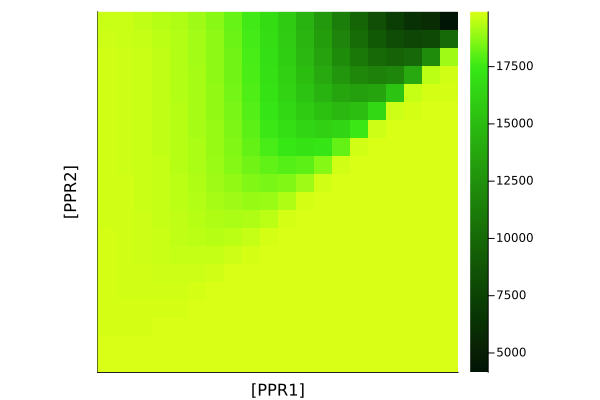

In [39]:
heatmap(results, c = palette(:linear_green_5_95_c69_n256), ratio = :equal, 
    xlims=(0.5,steps+0.5), ylims=(0.5,steps+0.5),
    xticks=[], yticks=[], xlabel="[PPR1]", ylabel="[PPR2]")